# Analysis of Berlin AirBnb data of 2019 and 2020 to get insights of possible influences of the corona pandemic

## Introduction
What influences does the Corona pandemic has on the air bnb market in Berlin?

## Questions to answer?
* Is the corona pandemic visible in the data of air bnb?
* Did the preferred booking location change? Did the type of accomondations change because of the pandemic?  
* What influences the over all scoring of an accomondation? Does that change during the corona pandemic? (like cleanliness get a more important role like before because of hygienic) 

## Used data:
Berlin data sets from Inside AirBnb (http://insideairbnb.com/get-the-data.html) for the years 2019 and 2020 consisting of the csv.-files for each year:
* listings - Detailed information for each accomondation in this area
* reviews - Collection of reviews for each accomondation in this area

### 1. How does the data of Inside AirBnb look like and what is useful to answer the booking question?

In [57]:
## Import nessessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [58]:
df_listings_2018 = pd.read_csv('listings_Nov2018.csv')
print(df_listings_2018.shape)

(22552, 96)


To gain insights into the dataset the columns are printed with their datatype.

In [59]:
for col in df_listings_2018.columns:
    print(f"{col}: {df_listings_2018[col].dtypes}")

id: int64
listing_url: object
scrape_id: int64
last_scraped: object
name: object
summary: object
space: object
description: object
experiences_offered: object
neighborhood_overview: object
notes: object
transit: object
access: object
interaction: object
house_rules: object
thumbnail_url: float64
medium_url: float64
picture_url: object
xl_picture_url: float64
host_id: int64
host_url: object
host_name: object
host_since: object
host_location: object
host_about: object
host_response_time: object
host_response_rate: object
host_acceptance_rate: float64
host_is_superhost: object
host_thumbnail_url: object
host_picture_url: object
host_neighbourhood: object
host_listings_count: float64
host_total_listings_count: float64
host_verifications: object
host_has_profile_pic: object
host_identity_verified: object
street: object
neighbourhood: object
neighbourhood_cleansed: object
neighbourhood_group_cleansed: object
city: object
state: object
zipcode: object
market: object
smart_location: object
cou

in the overview table are no direct information about the bookings, so the number of reviews will be used as an estimator, because I assume, that the number of reviews rises with the number of bookings. Therefore the collected reviews for the years 2018 to 2020 are used. 

# 2. Is the corona pandemic visible in the data of air bnb?

In [60]:
## Loadings of Review files
df_reviews_2018 = pd.read_csv('reviews_Nov2018.csv')
print(df_reviews_2018.shape)

df_reviews_2020 = pd.read_csv('reviews_Nov2020.csv')
print(df_reviews_2020.shape)

df_reviews_2019 = pd.read_csv('reviews_Nov2019.csv')
print(df_reviews_2019.shape)

(401963, 6)
(464468, 6)
(523816, 6)


Check in review files showed the timestamp for each review of each listing in the associated year. So counting of reviews per year of each listing id seams useful. Check of differences between the tables from 2018,2019 and 2020 whoed, that 2018 are less accomondations listed than 2019, and 2020 there are less than 2019. Seems like many hosts took their option off the market because of corona. but sure I can only be if I would compare the the numbers to earlier years

In [62]:
# How many listings can be found in the review overviews collected over different years?
print("Unique reviewed listings in collection of 2018: %s" % (len(pd.unique(df_reviews_2018.listing_id))))
print("Unique reviewed listings in collection of 2019: %s" % (len(pd.unique(df_reviews_2019.listing_id))))
print("Unique reviewed listings in collection of 2020: %s" % (len(pd.unique(df_reviews_2020.listing_id))))



Unique reviewed listings in collection of 2018: 18638
Unique reviewed listings in collection of 2019: 20505
Unique reviewed listings in collection of 2020: 16359


The dataframes contain collected information from 2016 on, but the listings in the collection are not rising from year to year. It could be, that the unique listings in the review collection correlate with the amount of active listings at the point in time the processing by air bnb to provide the data took place. 

In [63]:
## subsetting the review overviews to get the informations per year
reviews_2018_only = df_reviews_2018[df_reviews_2018.date.str.startswith("2018")]
reviews_2019_2018_only = df_reviews_2019[df_reviews_2019.date.str.startswith("2018")]
reviews_2019_only = df_reviews_2019[df_reviews_2019.date.str.startswith("2019")]
reviews_2020_only = df_reviews_2020[df_reviews_2020.date.str.startswith("2020")]
reviews_2020_2019_only = df_reviews_2020[df_reviews_2020.date.str.startswith("2019")]
reviews_2020_2018_only = df_reviews_2020[df_reviews_2020.date.str.startswith("2018")]

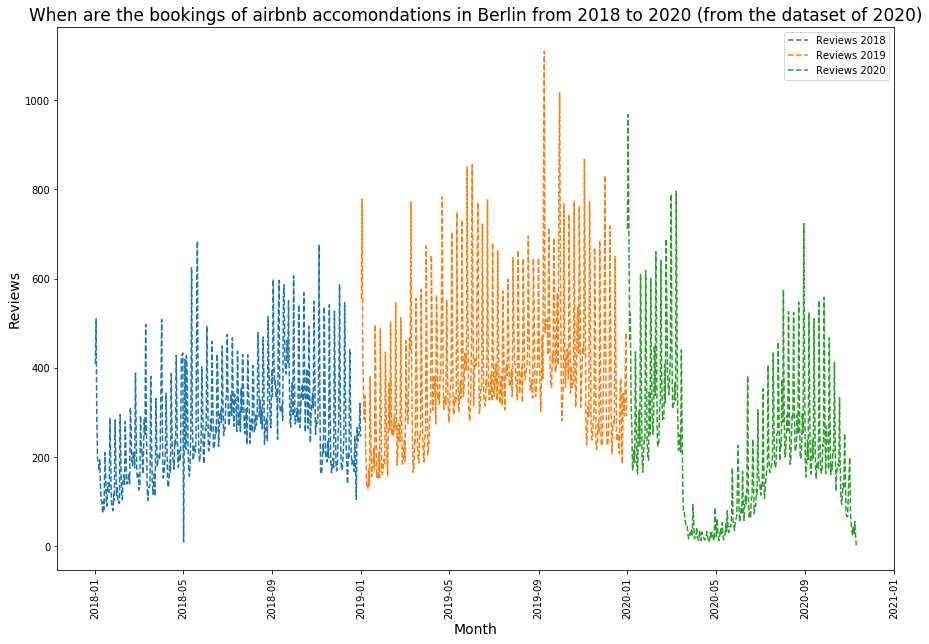

In [64]:
reviewsperday_2018 = reviews_2018_only.date.astype(dtype='datetime64[ns]').value_counts().sort_index(ascending=True)
reviewsperday_2018_2019 = reviews_2019_2018_only.date.astype(dtype='datetime64[ns]').value_counts().sort_index(ascending=True)
reviewsperday_2019 = reviews_2019_only.date.astype(dtype='datetime64[ns]').value_counts().sort_index(ascending=True)
reviewsperday_2018_2020 = reviews_2020_2018_only.date.astype(dtype='datetime64[ns]').value_counts().sort_index(ascending=True)
reviewsperday_2019_2020 = reviews_2020_2019_only.date.astype(dtype='datetime64[ns]').value_counts().sort_index(ascending=True)
reviewsperday_2020 = reviews_2020_only.date.astype(dtype='datetime64[ns]').value_counts().sort_index(ascending=True)

fig, ax = plt.subplots(figsize=(15,10))
plt.plot(reviewsperday_2018_2020, "--", label="Reviews 2018")
plt.plot(reviewsperday_2019_2020, "--", label="Reviews 2019")
plt.plot(reviewsperday_2020, "--", label="Reviews 2020")
ax.tick_params(axis="x",rotation=90)
plt.title("When are the bookings of airbnb accomondations in Berlin from 2018 to 2020 (from the dataset of 2020)",fontdict={'size':17})
plt.xlabel('Month',fontdict={'size':14})
plt.ylabel('Reviews',fontdict={'size':14})
plt.legend()
plt.savefig('ReviewsOverTime_2018-2020.png',dpi=600)
plt.show()

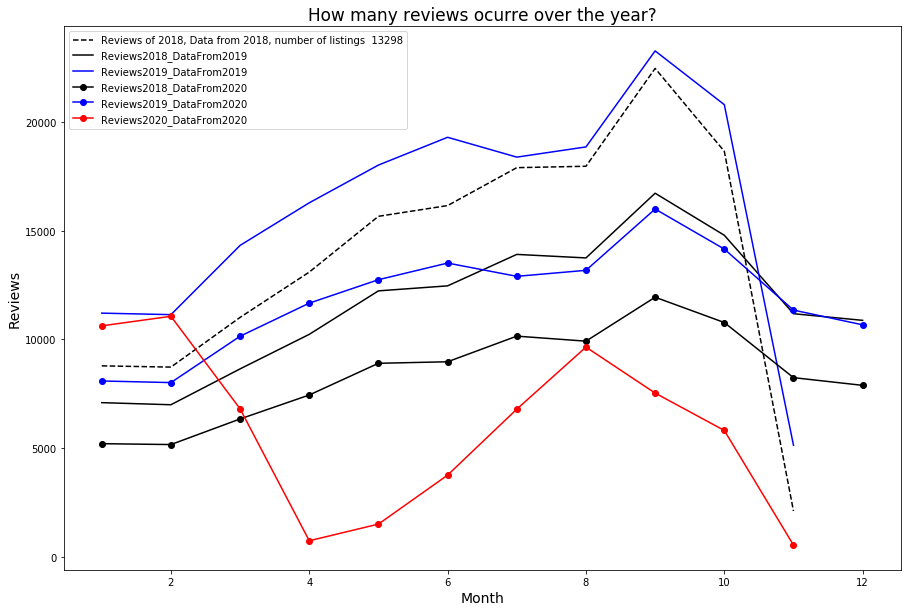

In [65]:
reviewspermonth_2018 = pd.DatetimeIndex(reviews_2018_only.date.astype(dtype='datetime64[M]')).month.value_counts().sort_index(ascending=True)
reviewspermonth_2018_2019 = pd.DatetimeIndex(reviews_2019_2018_only.date.astype(dtype='datetime64[M]')).month.value_counts().sort_index(ascending=True)
reviewspermonth_2019 = pd.DatetimeIndex(reviews_2019_only.date.astype(dtype='datetime64[M]')).month.value_counts().sort_index(ascending=True)
reviewspermonth_2018_2020 = pd.DatetimeIndex(reviews_2020_2018_only.date.astype(dtype='datetime64[M]')).month.value_counts().sort_index(ascending=True)
reviewspermonth_2019_2020 = pd.DatetimeIndex(reviews_2020_2019_only.date.astype(dtype='datetime64[M]')).month.value_counts().sort_index(ascending=True)
reviewspermonth_2020 = pd.DatetimeIndex(reviews_2020_only.date.astype(dtype='datetime64[M]')).month.value_counts().sort_index(ascending=True)

fig, ax = plt.subplots(figsize=(15,10))
plt.plot(reviewspermonth_2018, "k--",label="Reviews of 2018, Data from 2018, number of listings  %s" % (len(pd.unique(reviews_2018_only.listing_id))))
plt.plot(reviewspermonth_2018_2019, "k-", label="Reviews2018_DataFrom2019")
plt.plot(reviewspermonth_2019, "b-", label="Reviews2019_DataFrom2019")
plt.plot(reviewspermonth_2018_2020, "ko-", label="Reviews2018_DataFrom2020")
plt.plot(reviewspermonth_2019_2020, "bo-", label="Reviews2019_DataFrom2020")
plt.plot(reviewspermonth_2020, "ro-", label="Reviews2020_DataFrom2020")
plt.title("How many reviews ocurre over the year?",fontdict={'size':17})
plt.xlabel('Month',fontdict={'size':14})
plt.ylabel('Reviews',fontdict={'size':14})
plt.legend()

So to base observations on the same amount of available but maybe not reviewed accomodations I will use the review collection from 2020 because it also contains the review information of 2018 and 2019. So further the analysis will mostly be based on the df_reviews_2020 and the associated listing table of 2020.

In [66]:
review_vals = reviews_2018_only.listing_id.value_counts()
RV2018 = review_vals

Data2018_2 = [reviews_2018_only.shape[0],len(np.unique(reviews_2018_only.listing_id))]
print(Data2018_2)
Data2019_2 = [reviews_2019_only.shape[0],len(np.unique(reviews_2019_only.listing_id))]
print(Data2019_2)
Data2018_3 = [reviews_2019_2018_only.shape[0],len(np.unique(reviews_2019_2018_only.listing_id))]
print(Data2018_3)

[152448, 13298]
[176614, 13493]
[138827, 10757]


In [67]:
Data2018 = [reviews_2020_2018_only.shape[0],len(np.unique(reviews_2020_2018_only.listing_id))]
Data2019 = [reviews_2020_2019_only.shape[0],len(np.unique(reviews_2020_2019_only.listing_id))]
Data2020 = [reviews_2020_only.shape[0],len(np.unique(reviews_2020_only.listing_id))]
AllReviews = pd.DataFrame(data= [Data2018,Data2019,Data2020],index=["2018","2019","2020"],columns=["reviews","listings"])
print(AllReviews)

##Collecting amount of reviews per listing from the yearwise subsets
review_vals = reviews_2020_2018_only.listing_id.value_counts()
RV_2018_2020 = review_vals
review_vals = reviews_2020_2019_only.listing_id.value_counts()
RV2019_2020 = review_vals
review_vals = reviews_2020_only.listing_id.value_counts()
RV2020 = review_vals

## Combining the reviews of each year into one dataframe by merging them using the index/ listing ID
RV2018_2019_comb = RV_2018_2020.to_frame(name=2018).merge(RV2019_2020.to_frame(name=2019),how="right",right_index=True,left_index=True)
RV2018_2019_2020_comb = RV2018_2019_comb.merge(RV2020.to_frame(name=2020),how="left",right_index=True,left_index=True)

      reviews  listings
2018   100903      7526
2019   142357      9673
2020    64802      8711


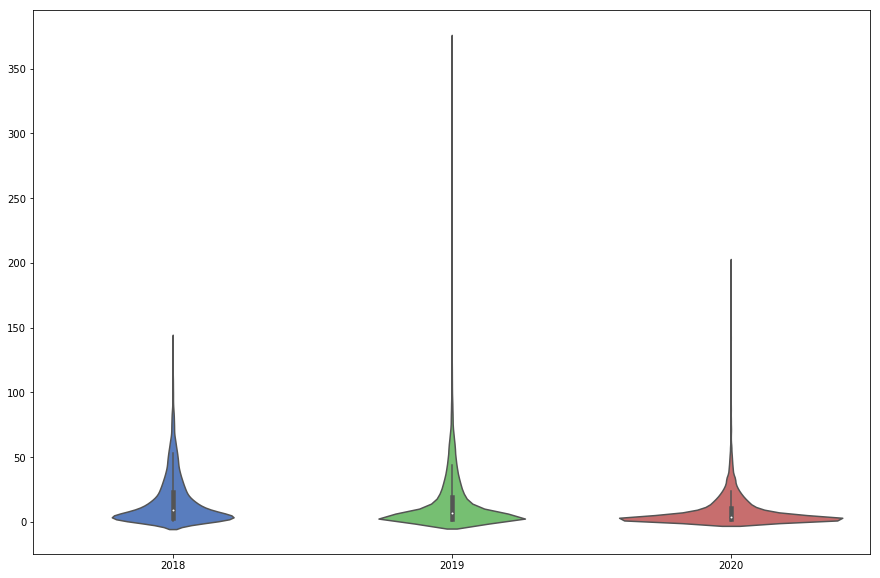

In [68]:
#Testing some plot variants to make the review distributions per year visible
#1. violinplot
fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(data=RV2018_2019_2020_comb,
               orient="v",
               palette="muted",showfliers=False)

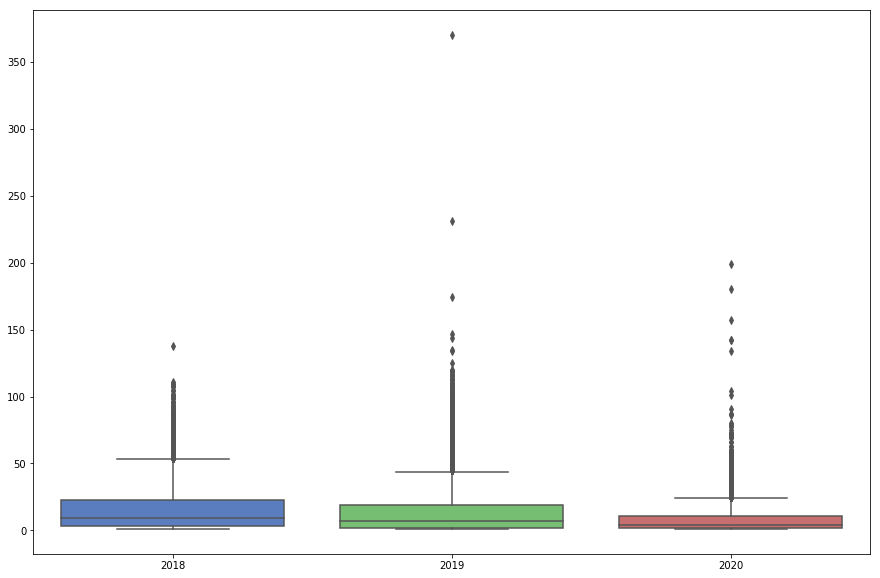

In [69]:
#2. boxplot
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=RV2018_2019_2020_comb,
               orient="v",
               palette="muted")

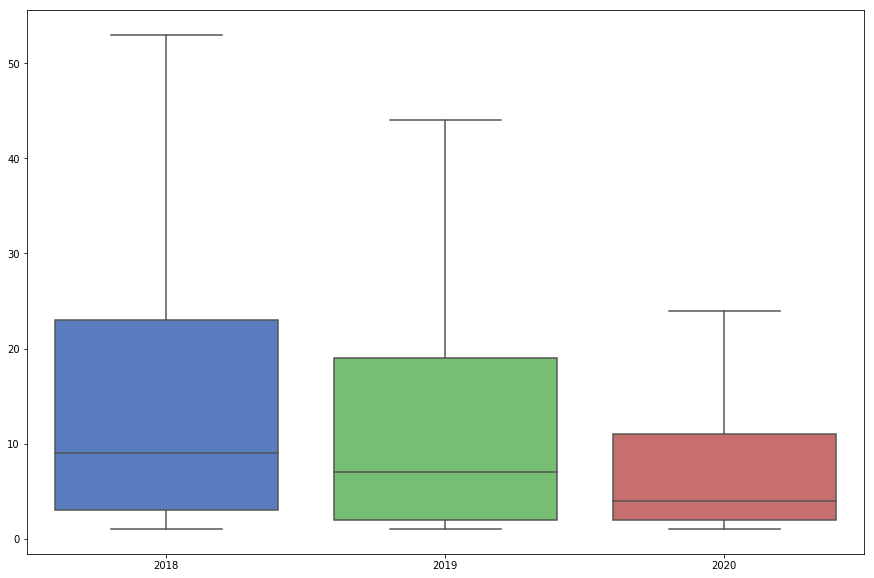

In [70]:
#2. boxplot without outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=RV2018_2019_2020_comb,
            orient="v",
            palette="muted",
            showfliers=False)

In [71]:
# Load normalized and preprocesses listings table of November 2020 
df_listings_2020 = pd.read_csv('listings_Nov2020.csv')
df_listings_2019 = pd.read_csv('listings_Nov2019.csv')

# Combining the reviews per year with the listings table by listing_id
ListingMerge = df_listings_2020.merge(RV2018_2019_2020_comb,how="left",right_index=True,left_on="id")
ListingMerge.columns = ListingMerge.columns.map(str) # changing the format of added columnnames to string for better usability

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (38,43,61,62,84,85,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Because the listings table from November 2020 is cleaned by airbnb I use this one and the associated reviews file, to see, if the amount of reviews/bookings for specific accomondations shows a trend from the city center of berlin towards the outer regions.

In [72]:
#Replace nan values of unreviewed listings by zero 
ListingMerge.loc[np.isnan(ListingMerge.loc[:,"2018"]),"2018"] = 0
ListingMerge.loc[np.isnan(ListingMerge.loc[:,"2019"]),"2019"] = 0
ListingMerge.loc[np.isnan(ListingMerge.loc[:,"2020"]),"2020"] = 0

In [73]:
# getting the range for each year 
U2018  = np.unique(ListingMerge[["2018"]])
U2019  = np.unique(ListingMerge[["2019"]])
U2020  = np.unique(ListingMerge[["2020"]])

# maximal amount of all reviews to set maximum colorvalue for comparability of plots 
MAll = max(U2018.max(),U2019.max(),U2020.max()) 
palette = sns.color_palette(palette='icefire', n_colors=int(MAll))

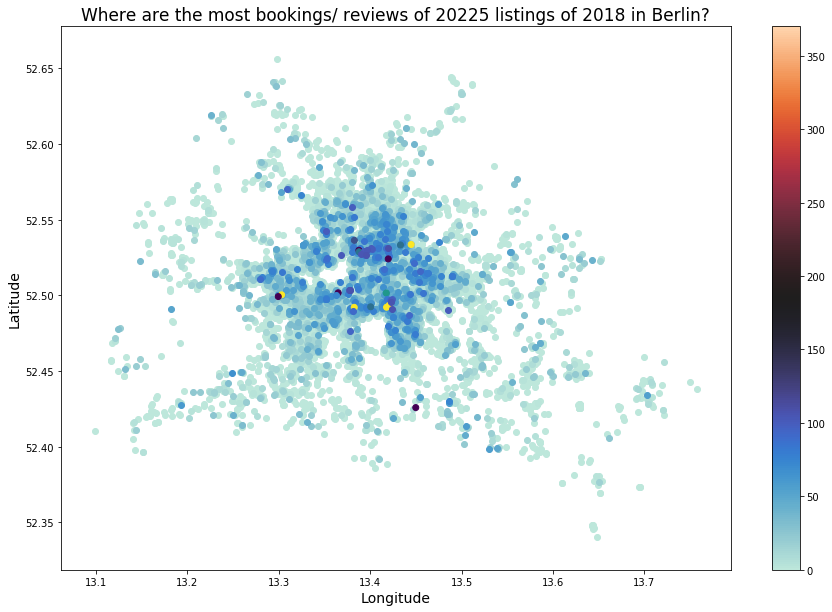

In [74]:
# Plotting the spacial distribution of the reviews by using the longitude and latitude of the associated listings for 2018
testMerge1 = ListingMerge.sort_values(by=['2018']) # Sorting the subset for 2018 
fig, ax = plt.subplots(figsize=(15,10))

for idx in range(len(U2018)): 
    Idx = testMerge1[["2018"]] == U2018[idx]
    data2plot = testMerge1[Idx.values]
    ax.scatter(y='latitude',
               x='longitude',
               c=palette[idx],
               data=data2plot)    
plt.xlabel('Longitude',fontdict={'size':14})
plt.ylabel('Latitude',fontdict={'size':14})
plt.title("Where are the most bookings/ reviews of %s listings of 2018 in Berlin?" % (ListingMerge.shape[0]),fontdict={'size':17})

norm = plt.Normalize(0, MAll)
sm = plt.cm.ScalarMappable(cmap='icefire', norm=norm)
sm.set_array([])
ax.figure.colorbar(sm)

plt.savefig('BerlinReviews2018_From2020.png',dpi=600)
plt.show()

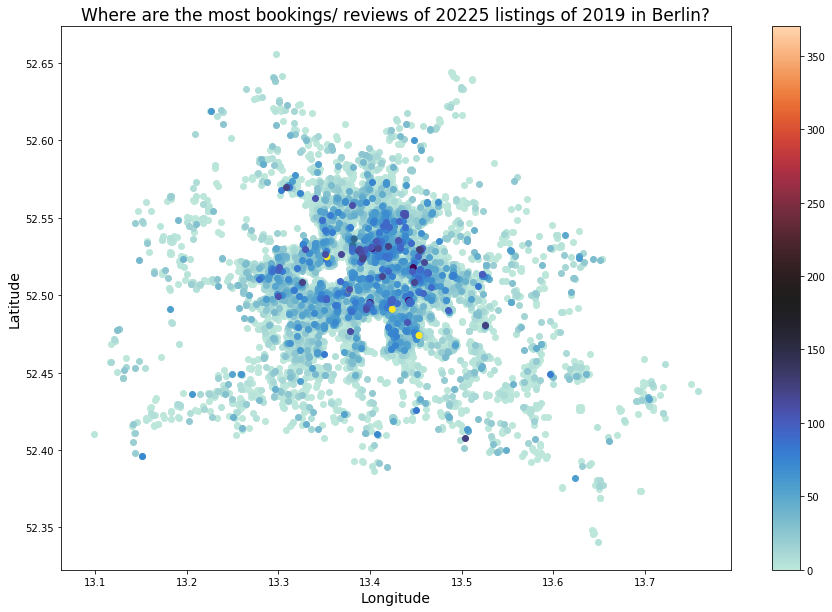

In [75]:
# Plotting the spacial distribution of the reviews by using the longitude and latitude of the associated listings for 2019
testMerge1 = ListingMerge.sort_values(by=['2019'])
fig, ax = plt.subplots(figsize=(15,10))

for idx in range(len(U2019)): 
    Idx = testMerge1[["2019"]] == U2019[idx]
    data2plot = testMerge1[Idx.values]
    ax.scatter(y='latitude',
               x='longitude',
               c=palette[idx],
               data=data2plot,
              label="Anzahl der Reviews: %s" % (U2019[idx]))
    
plt.xlabel('Longitude',fontdict={'size':14})
plt.ylabel('Latitude',fontdict={'size':14})
plt.title("Where are the most bookings/ reviews of %s listings of 2019 in Berlin?" % (ListingMerge.shape[0]),fontdict={'size':17})

norm = plt.Normalize(0, MAll)
sm = plt.cm.ScalarMappable(cmap='icefire', norm=norm)
sm.set_array([])
ax.figure.colorbar(sm)
    
plt.savefig('BerlinReviews2019_From2020.png',dpi=600)
plt.show()

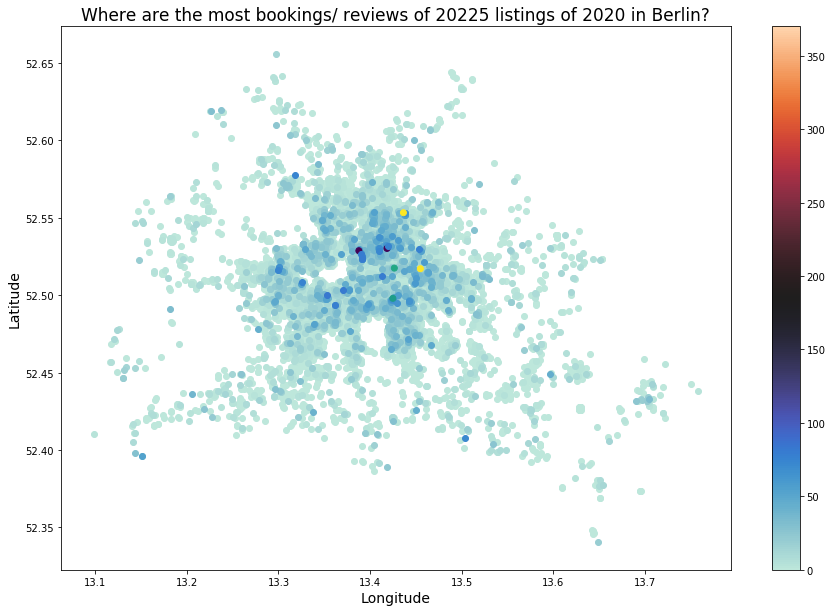

In [76]:
# Plotting the spacial distribution of the reviews by using the longitude and latitude of the associated listings for 2020
testMerge1 = ListingMerge.sort_values(by=['2020'])
fig, ax = plt.subplots(figsize=(15,10))

for idx in range(len(U2020)): 
    Idx = testMerge1[["2020"]] == U2020[idx]
    data2plot = testMerge1[Idx.values]
    ax.scatter(y='latitude',
               x='longitude',
               c=palette[idx],
               data=data2plot,
              label="Anzahl der Reviews: %s" % (U2020[idx]))
    
plt.xlabel('Longitude',fontdict={'size':14})
plt.ylabel('Latitude',fontdict={'size':14})
plt.title("Where are the most bookings/ reviews of %s listings of 2020 in Berlin?" % (ListingMerge.shape[0]),fontdict={'size':17})

norm = plt.Normalize(0,MAll)
sm = plt.cm.ScalarMappable(cmap='icefire', norm=norm)
sm.set_array([])
ax.figure.colorbar(sm)
    
plt.savefig('BerlinReviews2020_From2020.png',dpi=600)
plt.show()

Idea was to check if some values have changed over the corona pandemic. unfortunately the explicit scoring for each review is not with timestamp available, only the mean value over all scorings is shown in the listing table. I would see if I can produce a combined listing table with the information of 2020 and 2019 to get the overlapping accomodations. For the ones which will not be taken to account, nothing about changes in scoring can be shown or said. 

Text(0.5,1,'Room type proportions of 5689 listings reviewed in 2018')

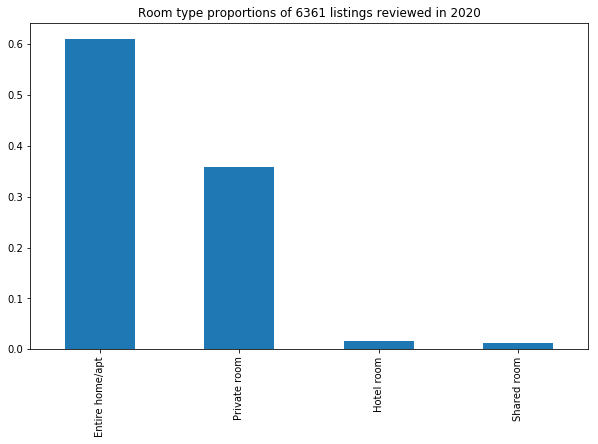

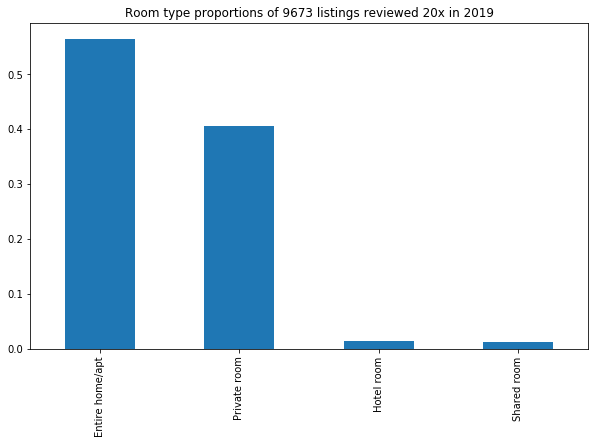

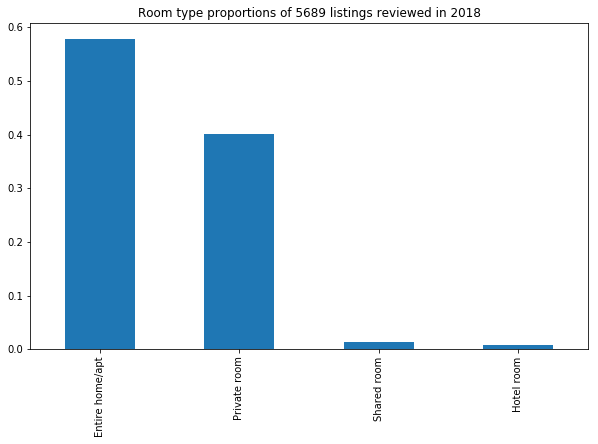

In [20]:
Idx = ListingMerge[["2020"]] > 0
ListingDiff20202019LZ = ListingMerge[Idx.values]
RoomType_vals = ListingDiff20202019LZ.room_type.value_counts()
RoomType_vals= RoomType_vals/ListingDiff20202019LZ.shape[0]
fig= plt.subplots(figsize=(10,6))
RoomType_vals.plot(kind="bar")
plt.title("Room type proportions of %s listings reviewed in 2020" % (ListingDiff20202019LZ.shape[0]))

Idx = ListingMerge[["2019"]] > 0
ListingDiff20202019LZ = ListingMerge[Idx.values]
RoomType_vals = ListingDiff20202019LZ.room_type.value_counts()
RoomType_vals= RoomType_vals/ListingDiff20202019LZ.shape[0]
fig= plt.subplots(figsize=(10,6))
RoomType_vals.plot(kind="bar")
plt.title("Room type proportions of %s listings reviewed 20x in 2019" % (ListingDiff20202019LZ.shape[0]))

Idx = ListingMerge[["2018"]] > 0
ListingDiff20202019LZ = ListingMerge[Idx.values]
RoomType_vals = ListingDiff20202019LZ.room_type.value_counts()
RoomType_vals= RoomType_vals/ListingDiff20202019LZ.shape[0]
fig= plt.subplots(figsize=(10,6))
RoomType_vals.plot(kind="bar")
plt.title("Room type proportions of %s listings reviewed in 2018" % (ListingDiff20202019LZ.shape[0]))

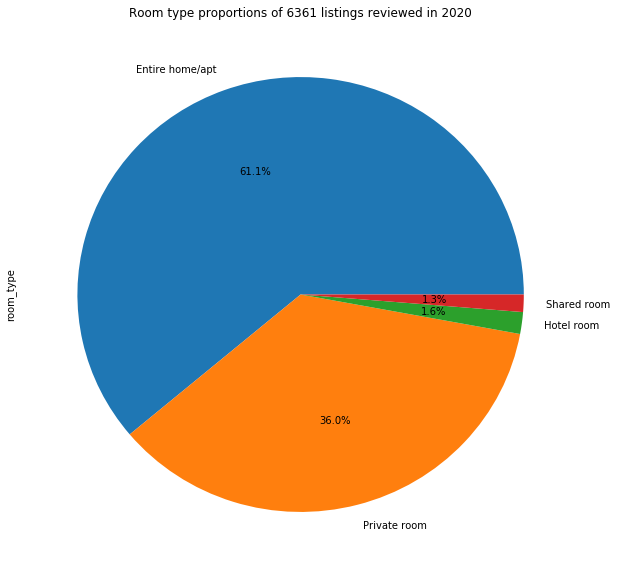

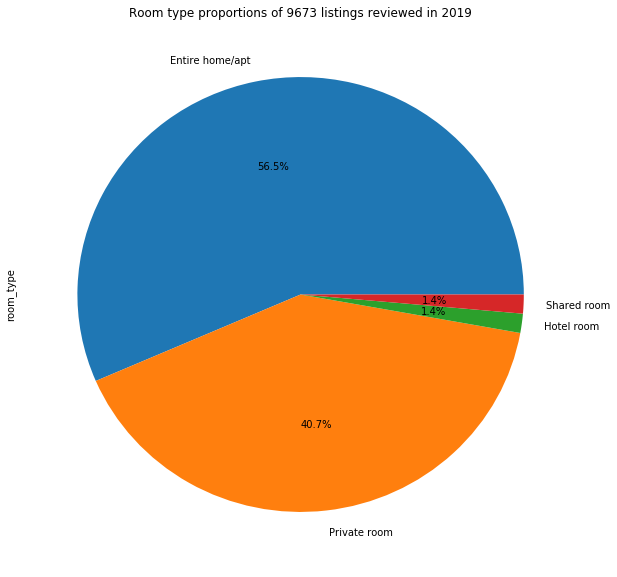

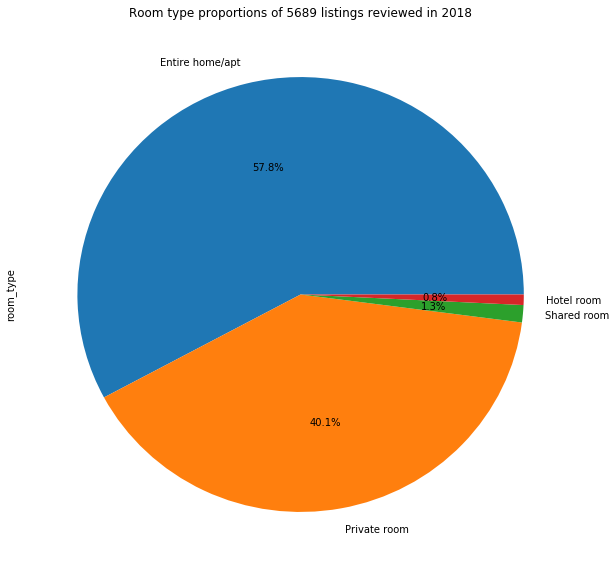

In [29]:
Idx = ListingMerge[["2020"]] > 0
ListingDiff20202019LZ = ListingMerge[Idx.values]
RoomType_vals = ListingDiff20202019LZ.room_type.value_counts()
RoomType_vals= RoomType_vals/ListingDiff20202019LZ.shape[0]
fig= plt.subplots(figsize=(10,10))
RoomType_vals.plot(kind="pie", autopct="%.1f%%")
plt.title("Room type proportions of %s listings reviewed in 2020" % (ListingDiff20202019LZ.shape[0]))
plt.savefig('RoomTypeRates_2020.png',dpi=600)
plt.show()

Idx = ListingMerge[["2019"]] > 0
ListingDiff20202019LZ = ListingMerge[Idx.values]
RoomType_vals = ListingDiff20202019LZ.room_type.value_counts()
RoomType_vals= RoomType_vals/ListingDiff20202019LZ.shape[0]
fig= plt.subplots(figsize=(10,10))
RoomType_vals.plot(kind="pie", autopct="%.1f%%")
plt.title("Room type proportions of %s listings reviewed in 2019" % (ListingDiff20202019LZ.shape[0]))
plt.savefig('RoomTypeRates_2019.png',dpi=600)
plt.show()

Idx = ListingMerge[["2018"]] > 0
ListingDiff20202019LZ = ListingMerge[Idx.values]
RoomType_vals = ListingDiff20202019LZ.room_type.value_counts()
RoomType_vals= RoomType_vals/ListingDiff20202019LZ.shape[0]
fig= plt.subplots(figsize=(10,10))
RoomType_vals.plot(kind="pie", autopct="%.1f%%")
plt.title("Room type proportions of %s listings reviewed in 2018" % (ListingDiff20202019LZ.shape[0]))
plt.savefig('RoomTypeRates_2018.png',dpi=600)
plt.show()


Text(0.5,1,'Room type proportions of 5689 listings reviewed in 2018')

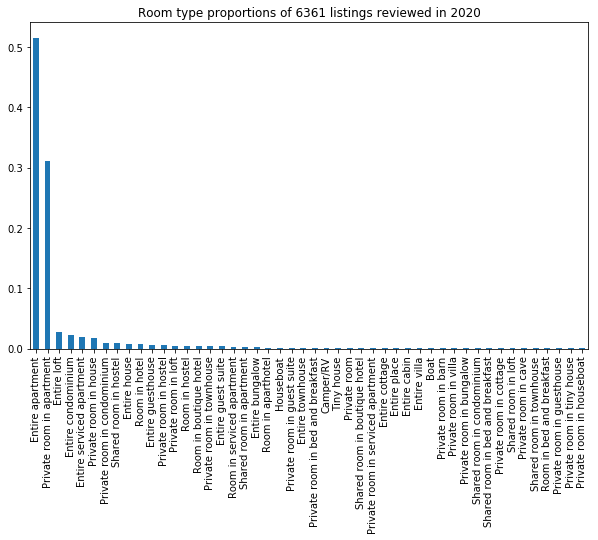

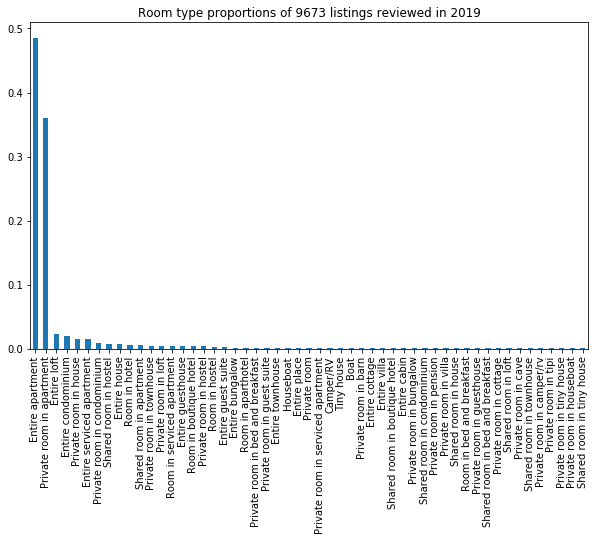

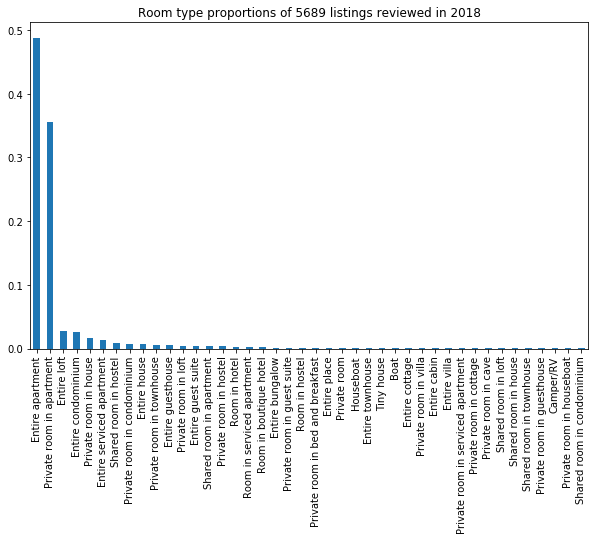

In [22]:
Idx = ListingMerge[["2020"]] > 0
ListingDiff20202019LZ = ListingMerge[Idx.values]
RoomType_vals = ListingDiff20202019LZ.property_type.value_counts()
RoomType_vals= RoomType_vals/ListingDiff20202019LZ.shape[0]
fig= plt.subplots(figsize=(10,6))
RoomType_vals.plot(kind="bar")
plt.title("Room type proportions of %s listings reviewed in 2020" % (ListingDiff20202019LZ.shape[0]))

Idx = ListingMerge[["2019"]] > 0
ListingDiff20202019LZ = ListingMerge[Idx.values]
RoomType_vals = ListingDiff20202019LZ.property_type.value_counts()
RoomType_vals= RoomType_vals/ListingDiff20202019LZ.shape[0]
fig= plt.subplots(figsize=(10,6))
RoomType_vals.plot(kind="bar")
plt.title("Room type proportions of %s listings reviewed in 2019" % (ListingDiff20202019LZ.shape[0]))

Idx = ListingMerge[["2018"]] > 0
ListingDiff20202019LZ = ListingMerge[Idx.values]
RoomType_vals = ListingDiff20202019LZ.property_type.value_counts()
RoomType_vals= RoomType_vals/ListingDiff20202019LZ.shape[0]
fig= plt.subplots(figsize=(10,6))
RoomType_vals.plot(kind="bar")
plt.title("Room type proportions of %s listings reviewed in 2018" % (ListingDiff20202019LZ.shape[0]))

Text(0.5,1,'Room type proportions of 5689 listings reviewed in 2018')

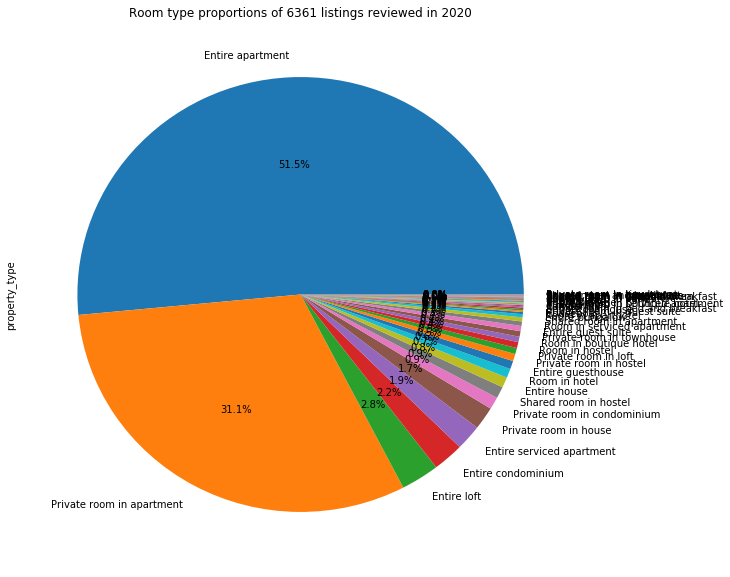

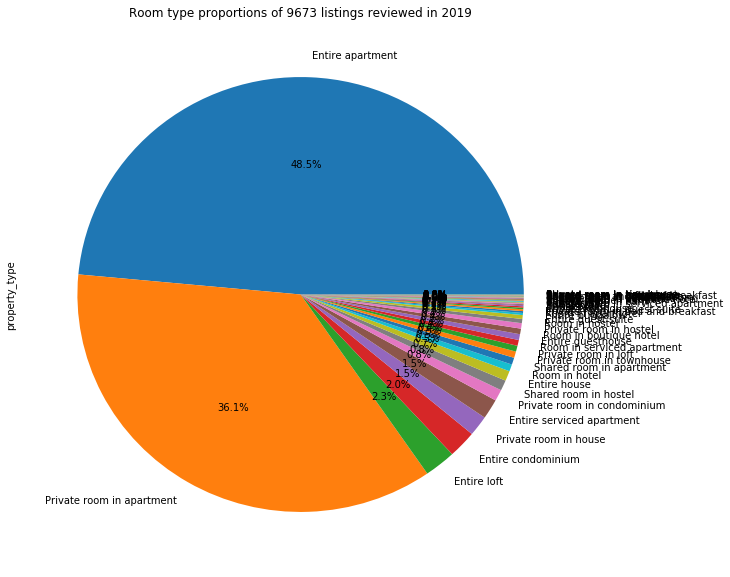

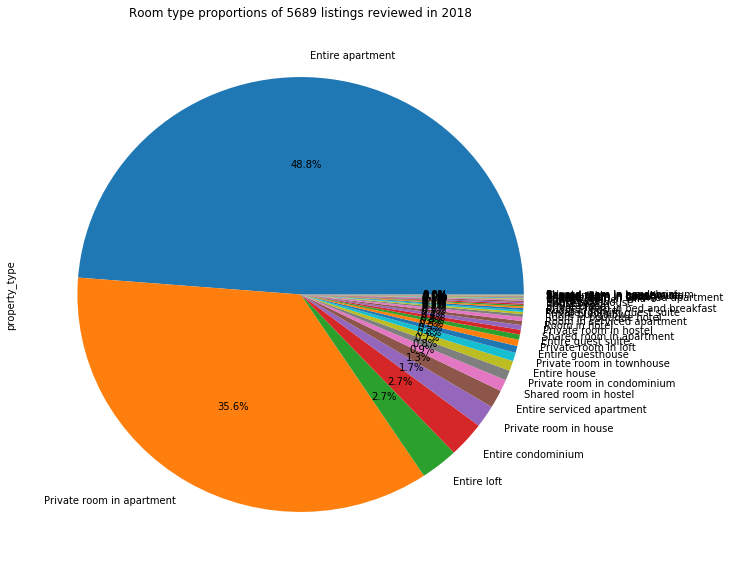

In [23]:
Idx = ListingMerge[["2020"]] > 0
ListingDiff20202019LZ = ListingMerge[Idx.values]
RoomType_vals = ListingDiff20202019LZ.property_type.value_counts()
RoomType_vals= RoomType_vals/ListingDiff20202019LZ.shape[0]
fig= plt.subplots(figsize=(10,10))
RoomType_vals.plot(kind="pie",autopct="%.1f%%")
plt.title("Room type proportions of %s listings reviewed in 2020" % (ListingDiff20202019LZ.shape[0]))

Idx = ListingMerge[["2019"]] > 0
ListingDiff20202019LZ = ListingMerge[Idx.values]
RoomType_vals = ListingDiff20202019LZ.property_type.value_counts()
RoomType_vals= RoomType_vals/ListingDiff20202019LZ.shape[0]
fig= plt.subplots(figsize=(10,10))
RoomType_vals.plot(kind="pie", autopct="%.1f%%")
plt.title("Room type proportions of %s listings reviewed in 2019" % (ListingDiff20202019LZ.shape[0]))

Idx = ListingMerge[["2018"]] > 0
ListingDiff20202019LZ = ListingMerge[Idx.values]
RoomType_vals = ListingDiff20202019LZ.property_type.value_counts()
RoomType_vals= RoomType_vals/ListingDiff20202019LZ.shape[0]
fig= plt.subplots(figsize=(10,10))
RoomType_vals.plot(kind="pie", autopct="%.1f%%")
plt.title("Room type proportions of %s listings reviewed in 2018" % (ListingDiff20202019LZ.shape[0]))

In [24]:
## select review score columns and columns with ids for combination of changes and afterwards reducing the listing dataframe to columns of interest
#for 2019
review_cols = df_listings_2019.filter(regex="review_scores").columns
id_cols = df_listings_2019.filter(regex="id").columns
types_cols = df_listings_2019.filter(regex="type").columns
review_cols = review_cols.append(id_cols)

df1 = pd.DataFrame(df_listings_2019, columns=review_cols)

#For 2020
review_cols = df_listings_2020.filter(regex="review_scores").columns
id_cols = df_listings_2020.filter(regex="id").columns
review_cols = review_cols.append(id_cols)

df2 = pd.DataFrame(df_listings_2020, columns=review_cols)

# merging both subsets for same listing ids
ScoringMerge = df2.merge(df1,how="inner",left_on="id",right_on="id",suffixes=("_2020","_2019"))

# clean dataframe from unnessecary columns host_identity
ScoringMerge = ScoringMerge.drop("host_identity_verified_2019",axis=1)
ScoringMerge = ScoringMerge.drop("host_identity_verified_2020",axis=1)

# clean dataframe from NaN entries => set to zero
for idx in ScoringMerge.columns:
    ScoringMerge.loc[np.isnan(ScoringMerge.loc[:,idx]), idx] = 0

print(ScoringMerge.columns)

Index(['review_scores_rating_2020', 'review_scores_accuracy_2020',
       'review_scores_cleanliness_2020', 'review_scores_checkin_2020',
       'review_scores_communication_2020', 'review_scores_location_2020',
       'review_scores_value_2020', 'id', 'scrape_id_2020', 'host_id_2020',
       'review_scores_rating_2019', 'review_scores_accuracy_2019',
       'review_scores_cleanliness_2019', 'review_scores_checkin_2019',
       'review_scores_communication_2019', 'review_scores_location_2019',
       'review_scores_value_2019', 'scrape_id_2019', 'host_id_2019'],
      dtype='object')


Text(0.5,1,'Difference review_scores_value')

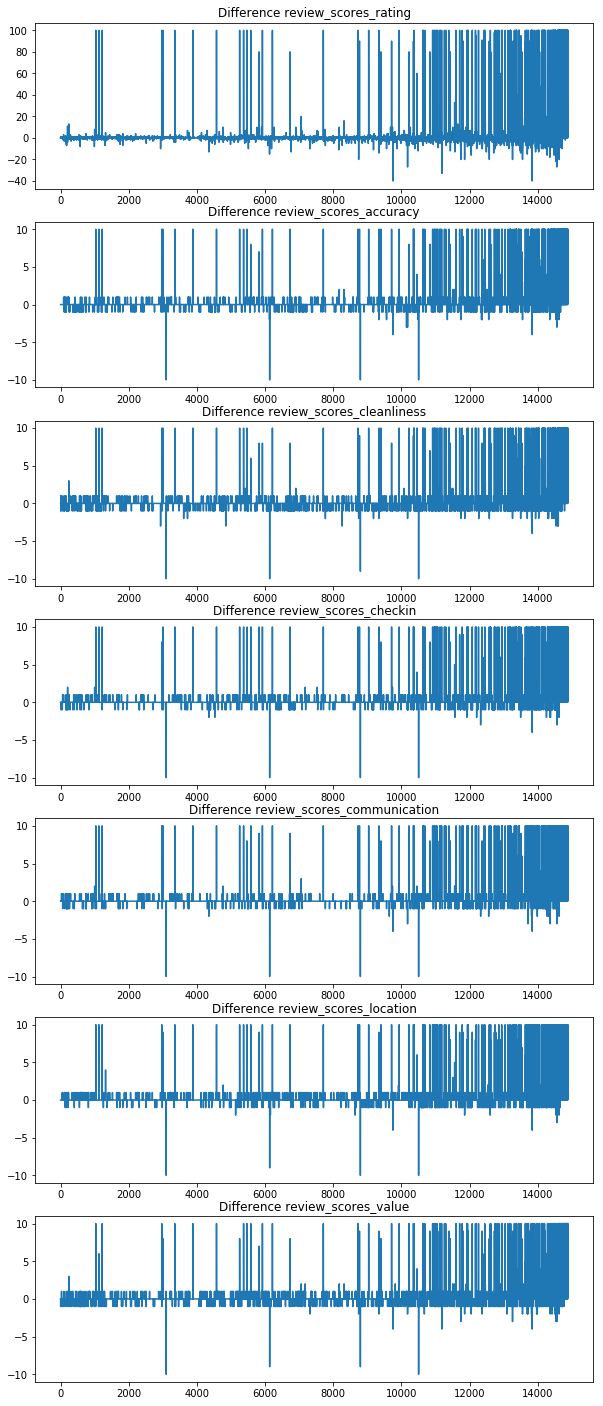

In [25]:
# Get a visual overview of the scoring features
fig, ax = plt.subplots(7,1,figsize=(10,25))
ax[0].plot(ScoringMerge[["review_scores_rating_2020"]].values-ScoringMerge[["review_scores_rating_2019"]].values)
ax[0].set_title('Difference review_scores_rating')
ax[1].plot(ScoringMerge[["review_scores_accuracy_2020"]].values-ScoringMerge[["review_scores_accuracy_2019"]].values)
ax[1].set_title('Difference review_scores_accuracy')
ax[2].plot(ScoringMerge[["review_scores_cleanliness_2020"]].values-ScoringMerge[["review_scores_cleanliness_2019"]].values)
ax[2].set_title('Difference review_scores_cleanliness')
ax[3].plot(ScoringMerge[["review_scores_checkin_2020"]].values-ScoringMerge[["review_scores_checkin_2019"]].values)
ax[3].set_title('Difference review_scores_checkin')
ax[4].plot(ScoringMerge[["review_scores_communication_2020"]].values-ScoringMerge[["review_scores_communication_2019"]].values)
ax[4].set_title('Difference review_scores_communication')
ax[5].plot(ScoringMerge[["review_scores_location_2020"]].values-ScoringMerge[["review_scores_location_2019"]].values)
ax[5].set_title('Difference review_scores_location')
ax[6].plot(ScoringMerge[["review_scores_value_2020"]].values-ScoringMerge[["review_scores_value_2019"]].values)
ax[6].set_title('Difference review_scores_value')

difference calculated between 2020 scores and 2019 scores showes nearly same trends over all individual scores.

In [26]:
# Using coefficient function from lessons
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [27]:
## Linear regression model for scoring information collected until december 2019
X = ScoringMerge[['review_scores_accuracy_2019','review_scores_cleanliness_2019', 'review_scores_checkin_2019','review_scores_communication_2019', 'review_scores_location_2019','review_scores_value_2019']]
y = ScoringMerge['review_scores_rating_2019']

# Split data into training and test data, and fit a linear model
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)
lm_model = LinearRegression(normalize=True)

# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
lm_model.fit(X_train, y_train)

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the results for 2019
coef_df

,est_int,coefs,abs_coefs
3,review_scores_communication_2019,3.148850,3.148850
1,review_scores_cleanliness_2019,2.627388,2.627388
0,review_scores_accuracy_2019,2.286491,2.286491
5,review_scores_value_2019,1.685171,1.685171
4,review_scores_location_2019,0.419749,0.419749
2,review_scores_checkin_2019,-0.331294,0.331294


In [28]:
## Linear regression model for scoring information collected until november 2020
X = ScoringMerge[['review_scores_accuracy_2020','review_scores_cleanliness_2020', 'review_scores_checkin_2020','review_scores_communication_2020', 'review_scores_location_2020','review_scores_value_2020']]
y = ScoringMerge['review_scores_rating_2020']

# Split data into training and test data, and fit a linear model
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)
lm_model = LinearRegression(normalize=True)

# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
lm_model.fit(X_train, y_train)

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the results for 2020
coef_df

,est_int,coefs,abs_coefs
3,review_scores_communication_2020,3.085766,3.085766
1,review_scores_cleanliness_2020,2.666884,2.666884
0,review_scores_accuracy_2020,2.365065,2.365065
5,review_scores_value_2020,1.682080,1.682080
4,review_scores_location_2020,0.354044,0.354044
2,review_scores_checkin_2020,-0.331063,0.331063


To estimate the rating based on the specific scoring features for collected information of 2019 and 2020 lead to linear models, which coefficients do not differ much. The most positive influence on the rating has the communication with the host and the cleanliness. 